Name: Faiza Siddiqui

Student ID: 200473896

Subject: CS715 - Advanced Data Science and Machine Learning Final Exam - Part 1

### SARIMAX AND ARIMA

In [1]:
# imported requires libraries and packages 

import pandas as pd
from pandas import datetime

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
from math import sqrt

# Set the default figure style
plt.style.use('./d4sci.mplstyle')

%matplotlib inline

<ipython-input-1-a2f28d3f14be>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [16]:
df = pd.read_csv('/content/FinalMergedDatasets2.csv', index_col='Date')
df.index = pd.to_datetime(df.index)
df

,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,...,STATIC_CPIXFET,CPIW,Open,High,Low,Close,Adj Close,Volume,Prime Rate,Bank of Canada Overnight Rate
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,221200,234700,194200,273800,...,1.1,1.6,9190.099609,9246.799805,8952.799805,9204.099609,9204.099609,2335454800,4.25,2.50
2005-01-02,100.6,100.6,100.4,100.7,100.3,101.1,222600,236200,195000,275600,...,1.4,1.7,9211.500000,9774.599609,9204.099609,9668.299805,9668.299805,2446392600,4.25,2.50
2005-01-03,101.4,101.4,101.0,101.4,100.6,101.7,224300,237900,196200,277700,...,1.5,1.9,9701.200195,9968.400391,9390.500000,9612.400391,9612.400391,2955365700,4.25,2.50
2005-01-04,102.2,102.3,101.8,102.2,100.8,102.3,226000,240000,197600,279800,...,1.1,1.8,9675.299805,9701.400391,9243.700195,9369.299805,9369.299805,2377228200,4.25,2.50
2005-01-05,102.8,103.0,102.4,103.0,101.0,102.8,227500,241800,198800,282000,...,1.2,1.6,9349.099609,9679.900391,9261.500000,9607.299805,9607.299805,2304422000,4.25,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,370.3,386.0,360.0,383.6,363.5,337.2,819200,905900,699200,1050200,...,5.2,6.3,20707.699220,21212.900390,19480.000000,20729.300780,20729.300780,6123813800,3.20,1.00
2022-01-06,363.3,377.9,350.4,376.2,358.0,333.8,803700,887000,680400,1030000,...,5.3,6.4,20816.699220,21036.400390,18661.500000,18861.400390,18861.400390,6198477400,3.70,1.50
2022-01-07,356.8,370.0,343.3,368.6,353.6,331.7,789300,868500,666600,1009300,...,5.5,6.2,18951.199220,19734.000000,18169.900390,19692.900390,19692.900390,4716787900,4.70,2.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 2005-01-01 to 2022-01-09
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Composite_HPI_SA               213 non-null    float64
 1   Single_Family_HPI_SA           213 non-null    float64
 2   One_Storey_HPI_SA              213 non-null    float64
 3   Two_Storey_HPI_SA              213 non-null    float64
 4   Townhouse_HPI_SA               213 non-null    float64
 5   Apartment_HPI_SA               213 non-null    float64
 6   Composite_Benchmark_SA         213 non-null    int64  
 7   Single_Family_Benchmark_SA     213 non-null    int64  
 8   One_Storey_Benchmark_SA        213 non-null    int64  
 9   Two_Storey_Benchmark_SA        213 non-null    int64  
 10  Townhouse_Benchmark_SA         213 non-null    int64  
 11  Apartment_Benchmark_SA         213 non-null    int64  
 12  V41690973                      

In [4]:
df.describe()

,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,...,STATIC_CPIXFET,CPIW,Open,High,Low,Close,Adj Close,Volume,Prime Rate,Bank of Canada Overnight Rate
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000
mean,198.466667,204.350704,191.772300,203.486385,184.174648,186.587324,439008.450704,479618.779343,372427.230047,5.571394e+05,...,1.713615,1.970423,14084.591553,14470.641722,13610.362909,14119.135235,14119.135235,4.275529e+09,3.489437,1.457746
std,66.429985,70.242944,61.851317,71.078958,65.412001,59.976800,146949.599317,164862.280789,120110.074556,1.946129e+05,...,0.864255,0.950828,2784.526241,2813.483413,2796.601294,2772.303852,2772.303852,1.164077e+09,1.138527,1.264761
min,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,221200.000000,234700.000000,194200.000000,2.738000e+05,...,0.400000,0.700000,7997.600098,9018.500000,7480.000000,8123.000000,8123.000000,3.796520e+07,2.250000,0.250000
25%,147.800000,150.000000,150.000000,145.900000,138.900000,144.500000,327000.000000,352000.000000,291300.000000,3.994000e+05,...,1.200000,1.400000,12200.700200,12511.500000,11649.400390,12239.400390,12239.400390,3.642521e+09,2.700000,0.500000
50%,176.800000,183.000000,171.500000,182.100000,154.800000,159.100000,391000.000000,429600.000000,333100.000000,4.985000e+05,...,1.700000,1.800000,13751.799810,14172.400390,13254.000000,13859.099610,13859.099610,4.271470e+09,3.000000,1.000000
75%,248.000000,251.900000,233.300000,254.200000,233.600000,244.300000,548500.000000,591300.000000,453000.000000,6.961000e+05,...,2.000000,2.100000,15587.000000,15922.599610,15164.700200,15547.799810,15547.799810,4.831907e+09,3.950000,1.750000
max,380.000000,398.200000,370.100000,395.500000,369.100000,338.100000,840600.000000,934500.000000,718700.000000,1.083000e+06,...,5.500000,6.400000,21970.800780,22213.099610,20912.099610,21890.199220,21890.199220,1.099686e+10,6.250000,4.500000


In [6]:
from statsmodels.tsa.stattools import adfuller

ts = pd.DataFrame(df).set_index(pd.date_range(start='1/1/2000', periods=len(df), freq='M'))

# Define a function to test for stationarity
def is_stationary(timeseries):
    result = adfuller(timeseries)
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

# Test for stationarity in each column of the dataframe
for col in ts.columns:
    print(f"Testing stationarity for column '{col}':")
    is_stationary(ts[col])
    print()

Testing stationarity for column 'Composite_HPI_SA':
p-value: 0.8034624159916028
Data is non-stationary

Testing stationarity for column 'Single_Family_HPI_SA':
p-value: 0.8666156175637151
Data is non-stationary

Testing stationarity for column 'One_Storey_HPI_SA':
p-value: 0.9432447423990696
Data is non-stationary

Testing stationarity for column 'Two_Storey_HPI_SA':
p-value: 0.912196321931412
Data is non-stationary

Testing stationarity for column 'Townhouse_HPI_SA':
p-value: 0.9929229604184512
Data is non-stationary

Testing stationarity for column 'Apartment_HPI_SA':
p-value: 0.9926020928174787
Data is non-stationary

Testing stationarity for column 'Composite_Benchmark_SA':
p-value: 0.8096737100803254
Data is non-stationary

Testing stationarity for column 'Single_Family_Benchmark_SA':
p-value: 0.8620961670430324
Data is non-stationary

Testing stationarity for column 'One_Storey_Benchmark_SA':
p-value: 0.9417624301957846
Data is non-stationary

Testing stationarity for column 'Two

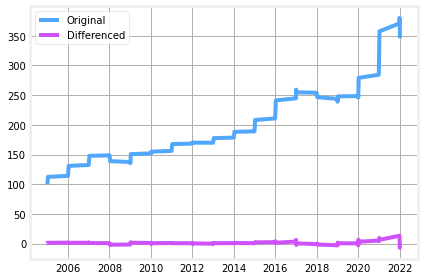

In [17]:
# Select the time series column
y = df['Composite_HPI_SA']

# Take the first difference of the time series
y_diff = y.diff().dropna()

# Plot the original and differenced time series
import matplotlib.pyplot as plt
plt.plot(y, label='Original')
plt.plot(y_diff, label='Differenced')
plt.legend()
plt.show()

In [18]:
df.columns

Index(['Composite_HPI_SA', 'Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA',
       'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'V41690973',
       'V41690914', 'STATIC_TOTALCPICHANGE', 'CPI_TRIM', 'CPI_MEDIAN',
       'CPI_COMMON', 'ATOM_V41693242', 'STATIC_CPIXFET', 'CPIW', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Prime Rate',
       'Bank of Canada Overnight Rate'],
      dtype='object')

In [19]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Specify the target variable and the independent variables
y = df["Composite_HPI_SA"]
X = df[['Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA',
       'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'V41690973',
       'V41690914', 'STATIC_TOTALCPICHANGE', 'CPI_TRIM', 'CPI_MEDIAN',
       'CPI_COMMON', 'ATOM_V41693242', 'STATIC_CPIXFET', 'CPIW', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Prime Rate',
       'Bank of Canada Overnight Rate']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the SARIMAX model to the training data
model = sm.tsa.statespace.SARIMAX(y_train, exog=X_train, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Make predictions on the test set
predictions = results.predict(exog=X_test)

# Calculate the error
# error = mean_absolute_error(y_test, predictions)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g.

In [23]:
import statsmodels.api as sm
import tqdm
import pandas as pd
# import pmdarima as pm
import numpy as np
# read dataframe
df = pd.read_csv('/content/FinalMergedDatasets2.csv').set_index('Date')
df.index = pd.to_datetime(df.index)
df = df[['Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA',
       'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'V41690973',
       'V41690914', 'STATIC_TOTALCPICHANGE', 'CPI_TRIM', 'CPI_MEDIAN',
       'CPI_COMMON', 'ATOM_V41693242', 'STATIC_CPIXFET', 'CPIW', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Prime Rate',
       'Bank of Canada Overnight Rate','Composite_HPI_SA']]

n = len(df.index)
predict_range = pd.date_range('2022-12-01', '2023-11-01', freq='MS')
predict_range = pd.to_datetime(predict_range)

# add predict date to df
df1 = pd.concat((df, pd.DataFrame(index=predict_range)))

n_train = 170
n_test = n-n_train

In [24]:
summaries = {}
for predColumn in tqdm.tqdm(['Composite_HPI_SA']):

    # data
    y = list(df1[predColumn])
    # train test
    train, test = y[:n_train], y[n_train:n]
    # train

    # adjust model
    model = sm.tsa.statespace.SARIMAX(train, trend='c', order=(1, 1, 1))

    res = model.fit(disp=False)
    summaries[predColumn] = res.summary()
    forecasts = res.predict(n_train, n + len(predict_range))
    # predict test + predict range

    # add forecasts to dataframe
    for i, v in zip(df1.index[n_train:], forecasts):
        df1.loc[i, f'predict_{predColumn}'] = v

100%|██████████| 1/1 [00:00<00:00, 10.81it/s]


error 5407.120556171937
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  170
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -133.650
Date:                Tue, 20 Dec 2022   AIC                            275.300
Time:                        18:09:43   BIC                            287.820
Sample:                             0   HQIC                           280.381
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0958      0.075      1.285      0.199      -0.050       0.242
ar.L1          0.8611      0.026     33.351      0.000       0.811       0.912
ma.L1          0.3855      0

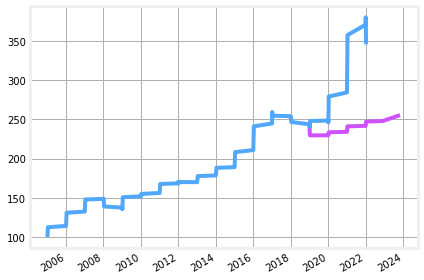

In [25]:
# change columns
column = 'Composite_HPI_SA'
pred_col = f'predict_{column}'

mse_error = np.square(df1[column][n_train:n] -
                      df1[pred_col][n_train:n]).mean()
print('error', mse_error)

df1[column].plot()
df1[pred_col].plot()

print(summaries[column])


**SARIMAX RESULT: MSE:5407.12 is not actually a good score, because it is beyond the range of values of Composite_HPI_SA**

##ARIMA Preparation

In [26]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# Specify the target variable and the independent variables
y = df["Composite_HPI_SA"]
X = df[['Single_Family_HPI_SA', 'One_Storey_HPI_SA',
       'Two_Storey_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA',
       'Composite_Benchmark_SA', 'Single_Family_Benchmark_SA',
       'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA',
       'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'V41690973',
       'V41690914', 'STATIC_TOTALCPICHANGE', 'CPI_TRIM', 'CPI_MEDIAN',
       'CPI_COMMON', 'ATOM_V41693242', 'STATIC_CPIXFET', 'CPIW', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Prime Rate',
       'Bank of Canada Overnight Rate']]

# Convert the data to a time series and specify the frequency
ts_X = pd.DataFrame(X).set_index(pd.date_range(start='1/1/2000', periods=len(X), freq='M'))
ts_y = pd.DataFrame(y).set_index(pd.date_range(start='1/1/2000', periods=len(y), freq='M'))

# Split the data into training and test sets
train_size = int(len(ts_X) * 0.8)
X_train, X_test = ts_X[:train_size], ts_X[train_size:]
y_train, y_test = ts_y[:train_size], ts_y[train_size:]

# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(y_train, exog=X_train, order=(1,1,1)).fit()

# Make predictions on the test set
predictions = model.predict(exog=X_test, start=len(y_train), end=len(y_train)+len(y_test)-1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.war

In [27]:
# Evaluate the model
print(model.summary())


                             ARIMA Model Results                              
Dep. Variable:     D.Composite_HPI_SA   No. Observations:                  169
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -147.977
Method:                       css-mle   S.D. of innovations              0.580
Date:                Tue, 20 Dec 2022   AIC                            359.954
Time:                        18:10:38   BIC                            460.110
Sample:                    02-29-2000   HQIC                           400.599
                         - 02-28-2014                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.6424      1.112     -1.477      0.140      -3.821       0.537
Single_Family_HPI_SA              2.9704        nan        nan        nan 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


Split 80% of the data set contained in series into a set called train. The remaining 20% will be contained in a set called test.

In [28]:
print(mean_absolute_error(y_test, predictions))

292.8844051502846


ARIMA RESULT: MSE:292.88 is not actually a good score, because it is very close to the maximum value of Composite_HPI_SA

In [29]:
# split into 80% train and 20% test sets

# make a copy of the series called X
X = df["Composite_HPI_SA"]

# specify that 80% of the data is for training
size = int(len(X) * 0.80)

# take a look at this line of code
# 80% is for training,
# so the remainder, size:len(X), is for testing
train, test = X[0:size], X[size:len(X)]

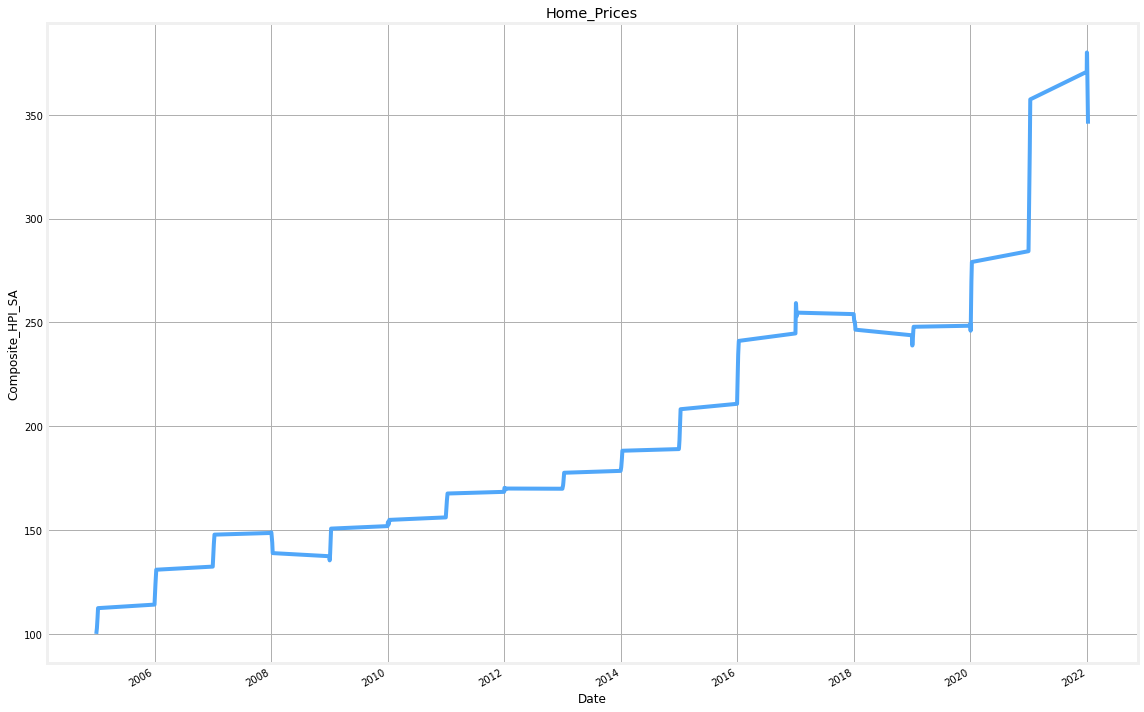

In [30]:
plt.rcParams["figure.figsize"] = (16, 10)

X.plot()
plt.title("Home_Prices")
plt.xlabel("Date")
plt.ylabel("Composite_HPI_SA")
plt.show()

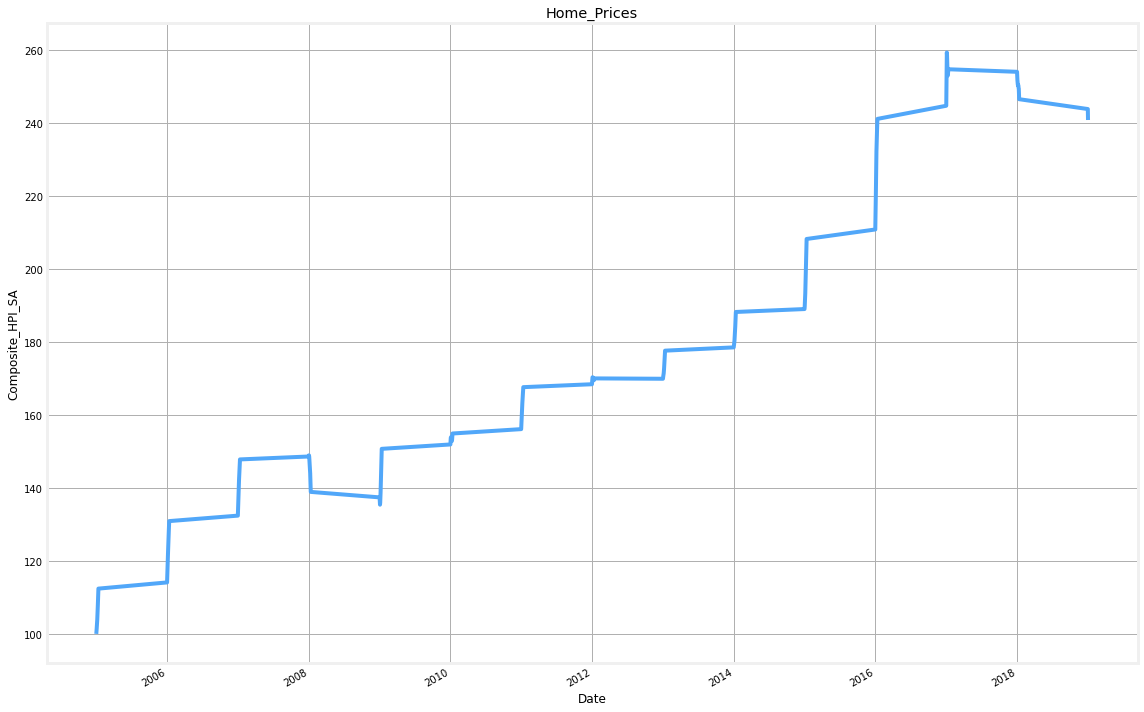

In [32]:
plt.rcParams["figure.figsize"] = (16, 10)

train.plot()
plt.title("Home_Prices")
plt.xlabel("Date")
plt.ylabel("Composite_HPI_SA")
plt.show()

Call the plot_acf method, sending train and lags=105.

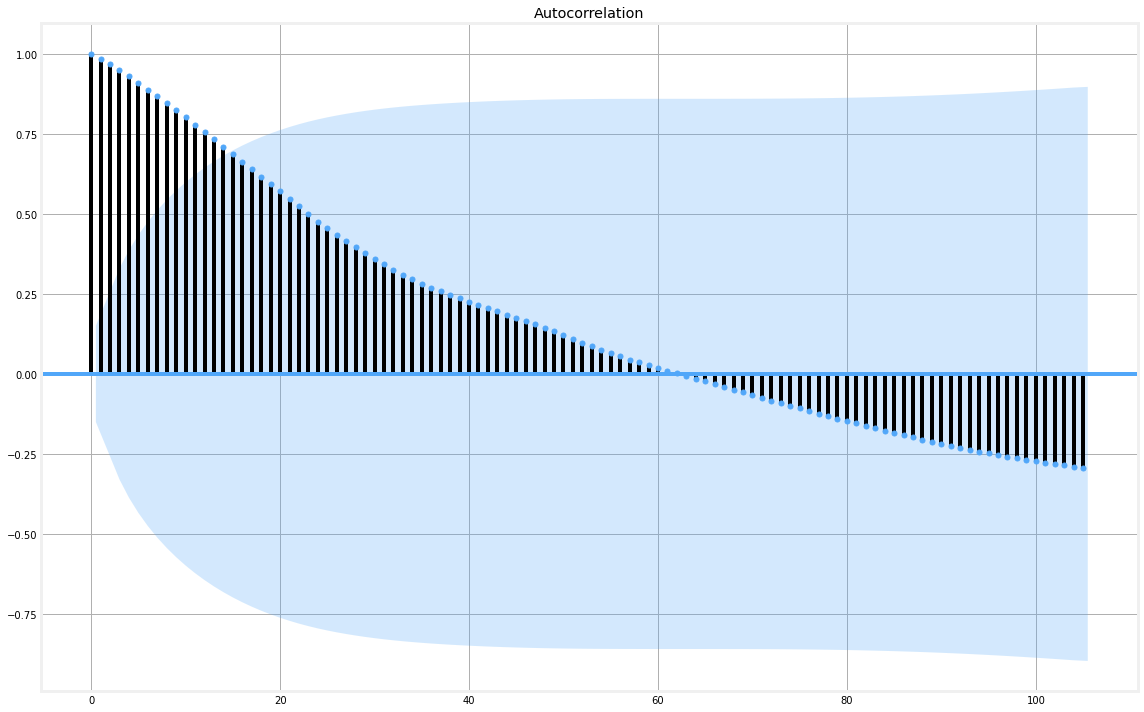

In [33]:
plot_acf(train, lags=105);

Create another series called fd_series that is the first difference of train.

Use train to call the diff method with a parameter of 1 followed by a call to dropna so that rows with "NaN" values are dropped.

In [34]:
fd_s = train.diff(1).dropna()

fd_s

Date
2005-01-02    0.6
2005-01-03    0.8
2005-01-04    0.8
2005-01-05    0.6
2005-01-06    1.1
             ... 
2018-01-10   -0.2
2018-01-11   -1.4
2018-01-12   -1.5
2019-01-01   -2.7
2019-01-02   -3.0
Name: Composite_HPI_SA, Length: 169, dtype: float64

Plot train and fd_series on a graph.

The graph should include a legend (meaning each line should be different colours), a meaningful title, a labelled X-axis, and a labelled Y-axis.

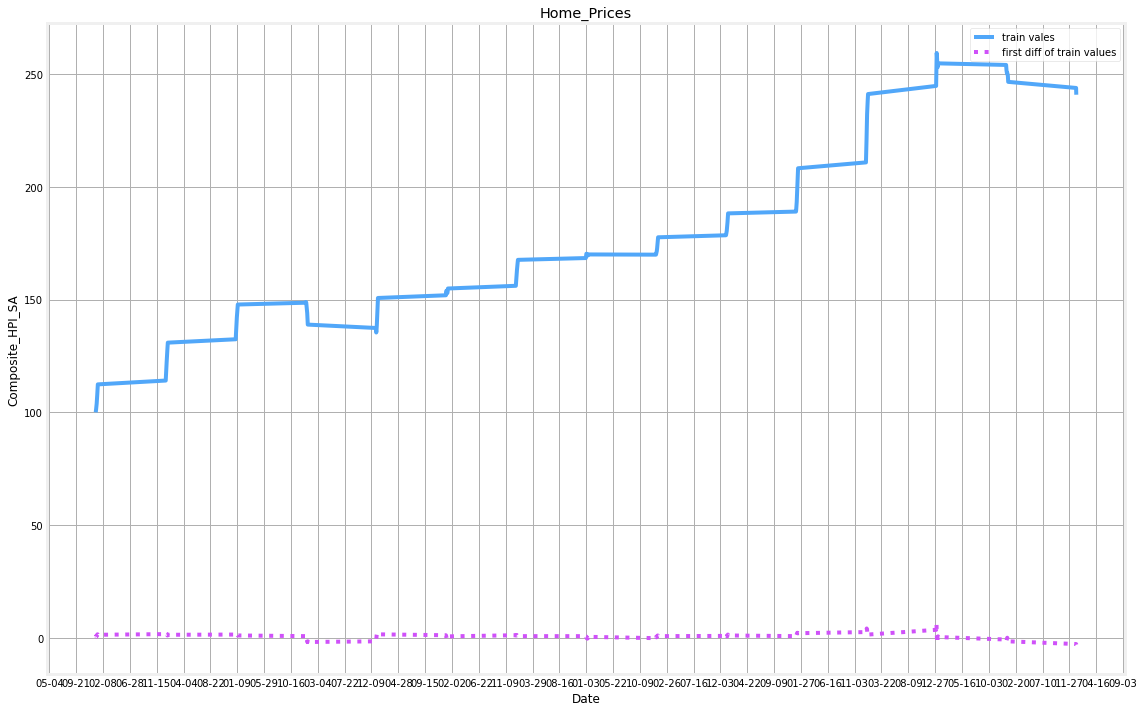

In [35]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(16,10))

# specify what you are plotting
# notice that we have two plots, one for each DataFrame
# also notice that each plot gets labelled (this is important for the legend)
ax.plot(train, label="train vales", linestyle="-")
ax.plot(fd_s, label="first diff of train values", linestyle=":")

ax.set(xlabel="Date", ylabel="Composite_HPI_SA",
       title="Home_Prices")

# format the x axis

# these two lines of code ensure that the dates do not overlap with each other
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=20))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# indicate that you want a legend
plt.legend()

# this line of code will show the plot in the output
plt.show()

You will notice that fd_series has several negative values due to the differencing.

In a later step, we will use an ARIMA model with the parameters  p=1  and  q=1 .

First, we will verify why we want to use  p=1 .

Call the plot_acf method, sending fd_series and lags=105.

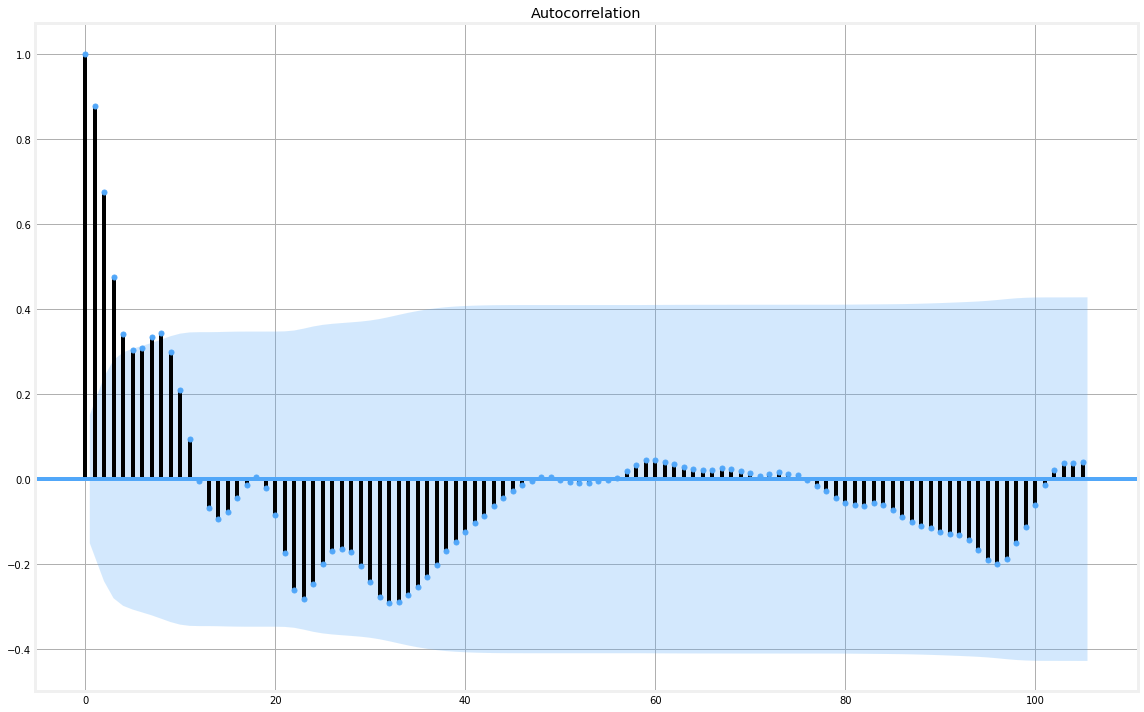

In [36]:
plot_acf(fd_s, lags=105);

After plotting the autocorrelation function, we always skip the first lag and then we should see that there is one significant lag that follows.

Thus, we will be using p=1 in a later step.

Now we will verify why we want to use these  q=1 .

Call the plot_pacf method, sending fd_series.

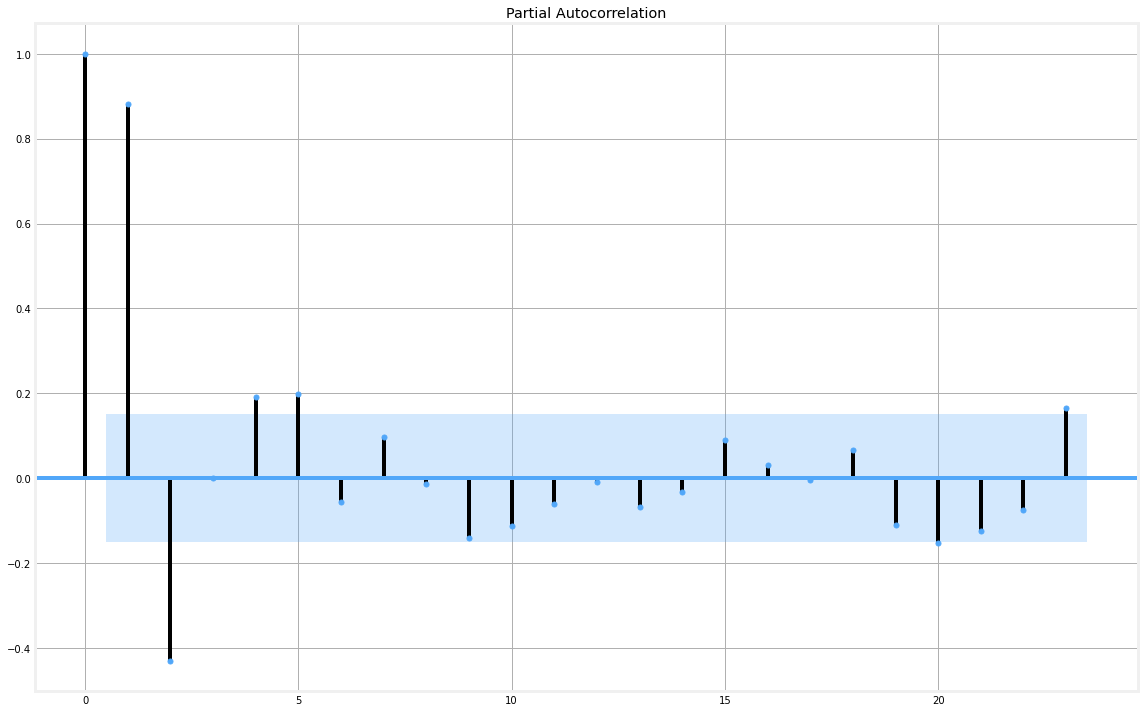

In [37]:
plot_pacf(fd_s);


Again, skip the very first lag and then we find that there is one significant lag that follows.

Thus, we will be using q=1 in a later step.

Create an ARIMA model using the train set and order( 1,1,1 ). This means that  p=1 ,  d=1 , and  q=1 .

Then fit the model and output the summary by calling the summary() method.

In [38]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Composite_HPI_SA   No. Observations:                  170
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -134.765
Date:                Tue, 20 Dec 2022   AIC                            275.531
Time:                        18:12:47   BIC                            284.920
Sample:                             0   HQIC                           279.341
                                - 170                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8939      0.021     41.938      0.000       0.852       0.936
ma.L1          0.3760      0.030     12.339      0.000       0.316       0.436
sigma2         0.2845      0.016     17.843      0.000       0.253       0.316
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):               820.62
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               5.47   Skew:                            -1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##Rolling Forecast ARIMA Model

Perform a data type conversion on the train and test sets so that they are numpy.ndarrays. We need to use the correct data type for the following steps.

In [39]:
#data type conversion on the train and test sets so that they are numpy.ndarrays
train = train.values
test = test.values


Create a numpy.ndarray called history that stores every value from train. Then create an empty list called predictions.

In [40]:
history = [x for x in train]
predictions = list()

Your task in this step is to perform walk-forward validation of an ARIMA model.

Please note that this process is computationally expensive (it will take almost a minute to complete). You can ignore any ConvergenceWarnings that might appear in the output during this step.

You will write a loop structure that iterates over every item in test. The loop must do the following:

Create an ARIMA model using the history set and order( 1,1,1 )
Create an object named model_fit that stores the fitted ARIMA model
Create an object named output that stores model_fit's forecast
Create a variable named pred that stores the first element of output
Append pred to predictions
Create a variable named obs that stores the current item of the test set
Append obs to history
Output (print) pred and obs each rounded to two decimal places

In [41]:
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	pred = output[0]
	predictions.append(pred)
	obs = test[t]
	history.append(obs)
	print('predicted=%.2f, expected=%.2f' % (pred, obs))

predicted=238.10, expected=238.90
predicted=237.52, expected=238.90
predicted=239.44, expected=239.40
predicted=239.82, expected=240.60
predicted=241.96, expected=242.00
predicted=243.25, expected=243.30
predicted=244.46, expected=244.90
predicted=246.48, expected=246.30
predicted=247.46, expected=247.30
predicted=248.12, expected=247.90
predicted=248.34, expected=248.40
predicted=248.86, expected=249.20
predicted=250.04, expected=249.00
predicted=248.42, expected=246.00
predicted=242.37, expected=248.10
predicted=251.50, expected=252.40
predicted=256.18, expected=259.10
predicted=265.78, expected=265.40
predicted=270.78, expected=269.80
predicted=273.28, expected=272.80
predicted=275.20, expected=275.90
predicted=278.76, expected=279.10
predicted=281.94, expected=284.30
predicted=289.55, expected=291.00
predicted=297.37, expected=298.30
predicted=305.12, expected=304.50
predicted=309.82, expected=310.40
predicted=315.85, expected=316.40
predicted=321.97, expected=320.90
predicted=324.

Recall the formula for Root Mean Square Error (RMSE):

RMSE=1N∑Ni=1(xi−x′i)2−−−−−−−−−−−−−−√ 

Compute and output (print) the Root Mean Square Error (RMSE) using the test and predictions sets.

Round to two decimal places.

In [42]:
rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)
print('Test RMSE: %.2f' % rmse)


2.5462936677778094
Test RMSE: 2.55


Recall the formula for Normalized RMSE:

NormalizedRMSE=RMSE(MaximumValue−MinimumValue) 

Compute and output (print) the Normalized RMSE.

In this case, let Maximum Value be test.max() and the Minimum Value be test.min().

Round to two decimal places.

In [43]:
max = test.max()
min = test.min()

nrmse = rmse / (max - min)
print(nrmse)
print('Test NRMSE: %.2f' % nrmse)


0.018046021741869662
Test NRMSE: 0.02


Plot test and predictions on a graph.

The graph should include a legend (meaning each line should be different colours), a meaningful title, a labelled X-axis, and a labelled Y-axis.

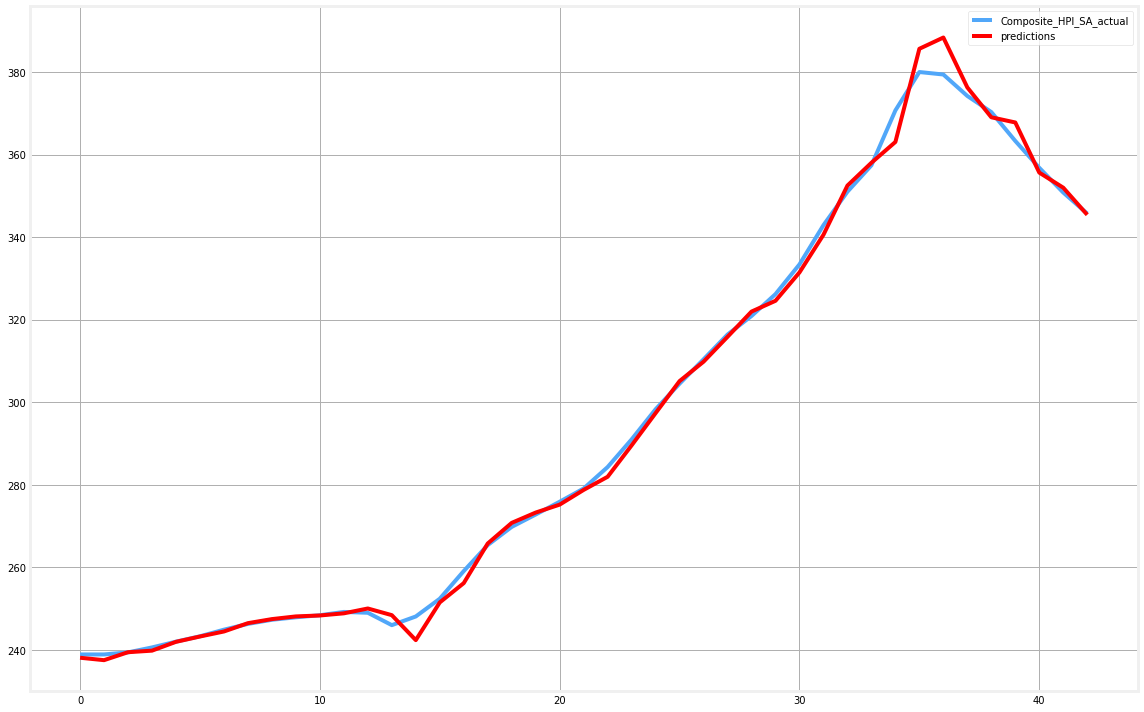

In [45]:
plt.plot(test, label="Composite_HPI_SA_actual")
plt.plot(predictions, color='red', label="predictions")
plt.legend()
plt.show()


##ARIMA Forecast 

An ARIMA model with slightly different parameters is created from before and then plot a forecast.

Create an object named model that stores an ARIMA model. The ARIMA model will take the following parameters: the full data set called series and order(2,1,2).

This step is for fun, which is why we use the full data set and skip the analysis process of our ARIMA model with such parameters.

In [46]:
model = ARIMA(X, order=(2,1,2))


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Create an object named model_fit that stores the fitted model.

In [47]:
model_fit = model.fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Create an object named model_fit that stores the fitted model.

In [48]:
forecast = model_fit.forecast(steps=52)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [49]:
print(forecast)

213    341.152573
214    337.783675
215    334.868136
216    332.718058
217    330.848557
218    329.476553
219    328.277635
220    327.402274
221    326.633298
222    326.074899
223    325.581612
224    325.225470
225    324.908985
226    324.681884
227    324.478800
228    324.334015
229    324.203677
230    324.111391
231    324.027726
232    323.968917
233    323.915201
234    323.877735
235    323.843241
236    323.819378
237    323.797222
238    323.782028
239    323.767795
240    323.758123
241    323.748977
242    323.742822
243    323.736944
244    323.733029
245    323.729250
246    323.726760
247    323.724330
248    323.722748
249    323.721185
250    323.720179
251    323.719173
252    323.718535
253    323.717888
254    323.717482
255    323.717066
256    323.716809
257    323.716540
258    323.716377
259    323.716204
260    323.716101
261    323.715989
262    323.715924
263    323.715852
264    323.715811
Name: predicted_mean, dtype: float64
